# section 3 +4

In [92]:
%matplotlib inline
from tslearn.clustering import silhouette_score
from sklearn.decomposition import PCA

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 8]

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import pandas as pd
from tslearn.utils import to_time_series_dataset
from sklearn.cluster import KMeans
import seaborn as sns
from dtaidistance import dtw
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from tslearn.clustering import silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

In [25]:
# Load the data
data = pd.read_csv(r'C:\Users\amitb\Documents\PTDS_final_project\Analysis\final_data.csv')

# Show the first few rows of the data
data.head()


,Unnamed: 0,Time,Max Temperature (°F),Avg Temperature (°F),Min Temperature (°F),Max Dew Point (°F),Avg Dew Point (°F),Min Dew Point (°F),Max Humidity (%),Avg Humidity (%),Min Humidity (%),Max Wind Speed (mph),Avg Wind Speed (mph),Min Wind Speed (mph),Max Pressure (in),Avg Pressure (in),Min Pressure (in),Total Precipitation (in),City
0,0,2022-01-01,73,64.5,54,62,58.9,53,97,83.2,59,18,11.6,0,27.7,27.6,27.5,0.00,"London, UK"
1,1,2022-01-02,63,57.3,50,61,54.4,48,100,90.5,75,16,8.2,0,27.6,27.6,27.5,0.93,"London, UK"
2,2,2022-01-03,50,38.0,26,49,34.1,22,97,85.9,61,43,22.8,8,28.0,27.6,27.3,0.65,"London, UK"
3,3,2022-01-04,42,31.1,22,26,23.3,20,96,74.9,51,12,5.7,0,28.1,28.0,27.9,0.01,"London, UK"
4,4,2022-01-05,55,40.6,34,35,28.8,23,79,64.1,38,15,5.0,0,27.9,27.7,27.6,0.00,"London, UK"


In [26]:
# Convert the 'Time' column to datetime format
data['Time'] = pd.to_datetime(data['Time'])

# Checking for missing values
missing_values = data.isnull().sum()

missing_values


Unnamed: 0                  0
Time                        0
Max Temperature (°F)        0
Avg Temperature (°F)        0
Min Temperature (°F)        0
Max Dew Point (°F)          0
Avg Dew Point (°F)          0
Min Dew Point (°F)          0
Max Humidity (%)            0
Avg Humidity (%)            0
Min Humidity (%)            0
Max Wind Speed (mph)        0
Avg Wind Speed (mph)        0
Min Wind Speed (mph)        0
Max Pressure (in)           0
Avg Pressure (in)           0
Min Pressure (in)           0
Total Precipitation (in)    0
City                        0
dtype: int64

In [27]:
# Sort data by city and time
data = data.sort_values(['City', 'Time'])
data=data.drop(columns=['Unnamed: 0','Max Dew Point (°F)','Min Dew Point (°F)','Max Humidity (%)','Min Humidity (%)','Max Wind Speed (mph)','Min Wind Speed (mph)','Max Pressure (in)','Min Pressure (in)','Total Precipitation (in)'])

In [28]:
data

,Time,Max Temperature (°F),Avg Temperature (°F),Min Temperature (°F),Avg Dew Point (°F),Avg Humidity (%),Avg Wind Speed (mph),Avg Pressure (in),City
4745,2022-01-01,76,67.8,59,63.0,85.5,17.6,28.7,"Athens, Greece"
4746,2022-01-02,61,55.9,44,53.9,93.2,8.3,28.8,"Athens, Greece"
4747,2022-01-03,41,32.8,29,29.8,88.7,10.4,29.1,"Athens, Greece"
4748,2022-01-04,37,30.1,26,28.2,93.0,4.5,29.2,"Athens, Greece"
4749,2022-01-05,51,36.8,27,33.4,88.8,8.2,29.0,"Athens, Greece"
...,...,...,...,...,...,...,...,...,...
2185,2022-12-27,45,35.3,28,26.0,70.2,2.8,29.6,"Washington, USA"
2186,2022-12-28,60,44.7,25,27.6,54.4,11.8,29.5,"Washington, USA"
2187,2022-12-29,64,56.9,51,42.4,59.8,12.6,29.5,"Washington, USA"
2188,2022-12-30,68,60.5,56,48.9,68.0,9.1,29.4,"Washington, USA"


In [29]:
# normelize the data
min_value = 0
max_value = 1

columns_to_scale = ['Max Temperature (°F)','Avg Temperature (°F)','Min Temperature (°F)','Avg Dew Point (°F)','Avg Humidity (%)','Avg Wind Speed (mph)','Avg Pressure (in)']

data[columns_to_scale] = data[columns_to_scale].apply(lambda x: (x - x.min()) / (x.max() - x.min()) * (max_value - min_value) + min_value)


In [30]:
data

,Time,Max Temperature (°F),Avg Temperature (°F),Min Temperature (°F),Avg Dew Point (°F),Avg Humidity (%),Avg Wind Speed (mph),Avg Pressure (in),City
4745,2022-01-01,0.745098,0.744237,0.741176,0.839773,0.865385,0.770925,0.875000,"Athens, Greece"
4746,2022-01-02,0.598039,0.613611,0.564706,0.736364,0.943320,0.361233,0.883929,"Athens, Greece"
4747,2022-01-03,0.401961,0.360044,0.388235,0.462500,0.897773,0.453744,0.910714,"Athens, Greece"
4748,2022-01-04,0.362745,0.330406,0.352941,0.444318,0.941296,0.193833,0.919643,"Athens, Greece"
4749,2022-01-05,0.500000,0.403952,0.364706,0.503409,0.898785,0.356828,0.901786,"Athens, Greece"
...,...,...,...,...,...,...,...,...,...
2185,2022-12-27,0.441176,0.387486,0.376471,0.419318,0.710526,0.118943,0.955357,"Washington, USA"
2186,2022-12-28,0.588235,0.490670,0.341176,0.437500,0.550607,0.515419,0.946429,"Washington, USA"
2187,2022-12-29,0.627451,0.624588,0.647059,0.605682,0.605263,0.550661,0.946429,"Washington, USA"
2188,2022-12-30,0.666667,0.664105,0.705882,0.679545,0.688259,0.396476,0.937500,"Washington, USA"


In [31]:

TempWeight=0.35
HuWeight=0.25
WindWeight=0.2
DPWeight=0.15
PressureWeight=0.05

data['Weighted_Column'] = data['Avg Temperature (°F)'] * TempWeight + data['Avg Humidity (%)'] * HuWeight + data['Avg Wind Speed (mph)'] * WindWeight + data['Avg Dew Point (°F)'] * DPWeight + data['Avg Pressure (in)'] * PressureWeight



# Sort data by city and time
data = data.sort_values(['City', 'Time'])

#####################################################################


# Initialize sequence list
cities_sequences_weighted_weather= []


# Iterate over each city
for city in data['City'].unique():
    city_data = data[data['City'] == city]
    
    
    #find the date when coldest
    min_temperature = city_data['Min Temperature (°F)'].min()
    coldest_date = city_data.loc[city_data['Min Temperature (°F)']==min_temperature, 'Time'].values[0]

    # find the date when hottest
    max_temperature = city_data['Max Temperature (°F)'].max()
    hottest_date = city_data.loc[city_data['Max Temperature (°F)']==max_temperature, 'Time'].values[0]

    if(hottest_date>=coldest_date):
        filtered_city_data = city_data[(city_data['Time'] >= coldest_date) & (data['Time'] <= hottest_date)]
    else:
        filtered_city_data = city_data[(city_data['Time'] >= hottest_date) & (data['Time'] <= coldest_date)]

    # Append the sequence data to our list
    
    cities_sequences_weighted_weather.append([city, len(filtered_city_data), filtered_city_data['Weighted_Column']])



C:\Users\amitb\AppData\Local\Temp\ipykernel_29144\2729363023.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_city_data = city_data[(city_data['Time'] >= hottest_date) & (data['Time'] <= coldest_date)]
C:\Users\amitb\AppData\Local\Temp\ipykernel_29144\2729363023.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_city_data = city_data[(city_data['Time'] >= coldest_date) & (data['Time'] <= hottest_date)]


## Kmeans

In [32]:
# Extract the time series data from the nested list
time_series_data = [city_data[2].values for city_data in cities_sequences_weighted_weather]

# Convert the time series data to a tslearn-compatible format
X = to_time_series_dataset(time_series_data)

### Hyperparemeter

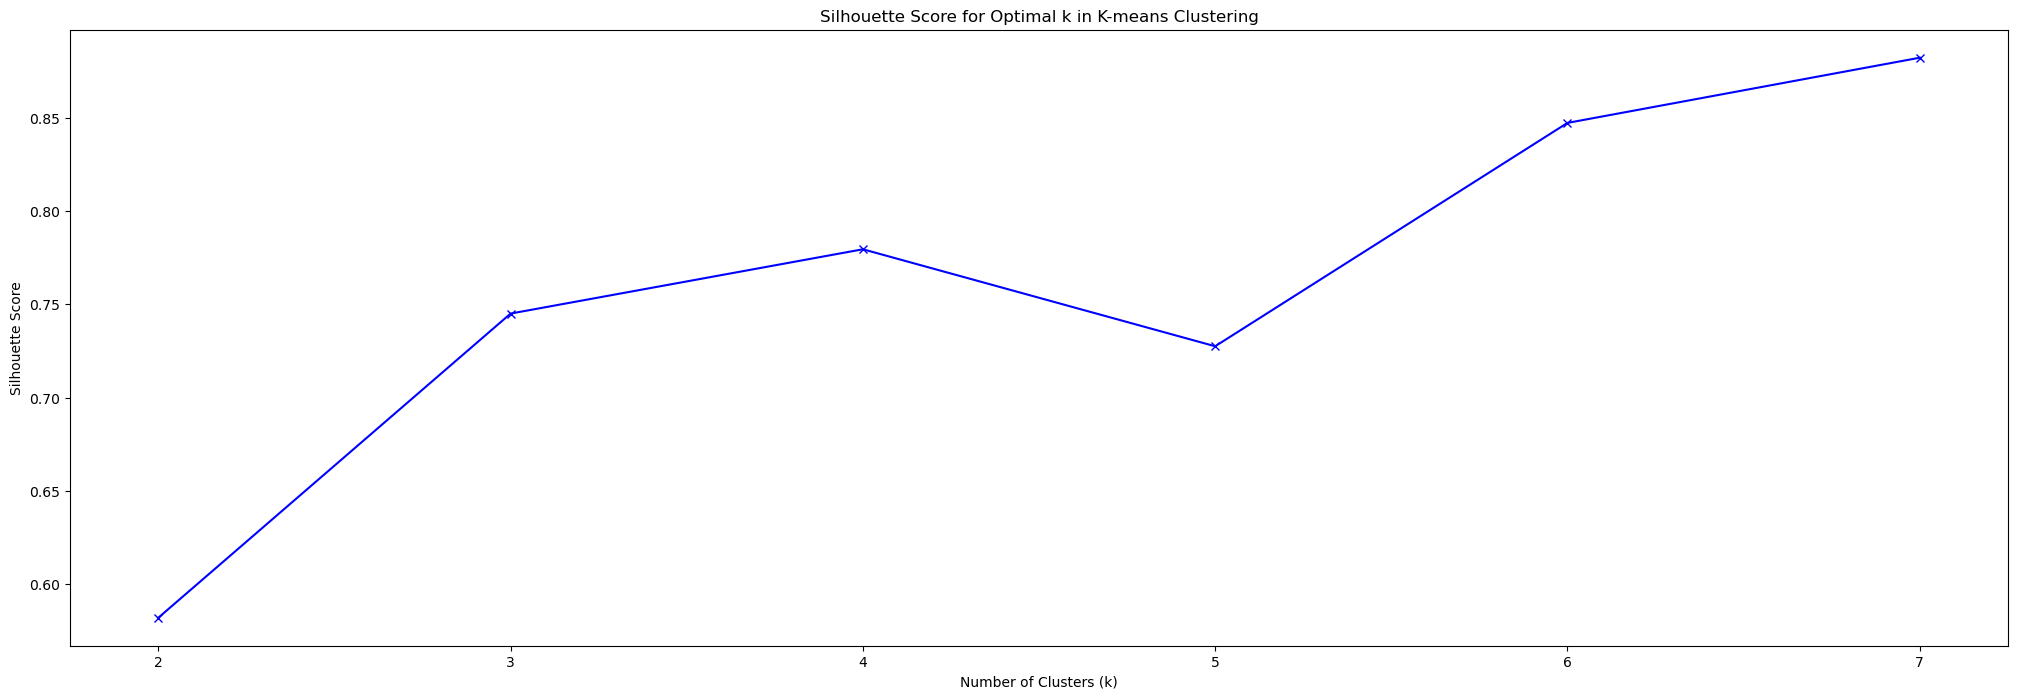

In [35]:
# Perform hyperparameter tuning for k-means clustering
n_clusters_range = range(2, 8)
silhouette_scores = []

for n_clusters in n_clusters_range:
    kmeans = TimeSeriesKMeans(
        n_clusters=n_clusters, metric="dtw", verbose=False, random_state=42
    )
    y_pred = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, y_pred))

# Plot the silhouette scores for different values of k
plt.plot(n_clusters_range, silhouette_scores, "bx-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal k in K-means Clustering")
plt.show()

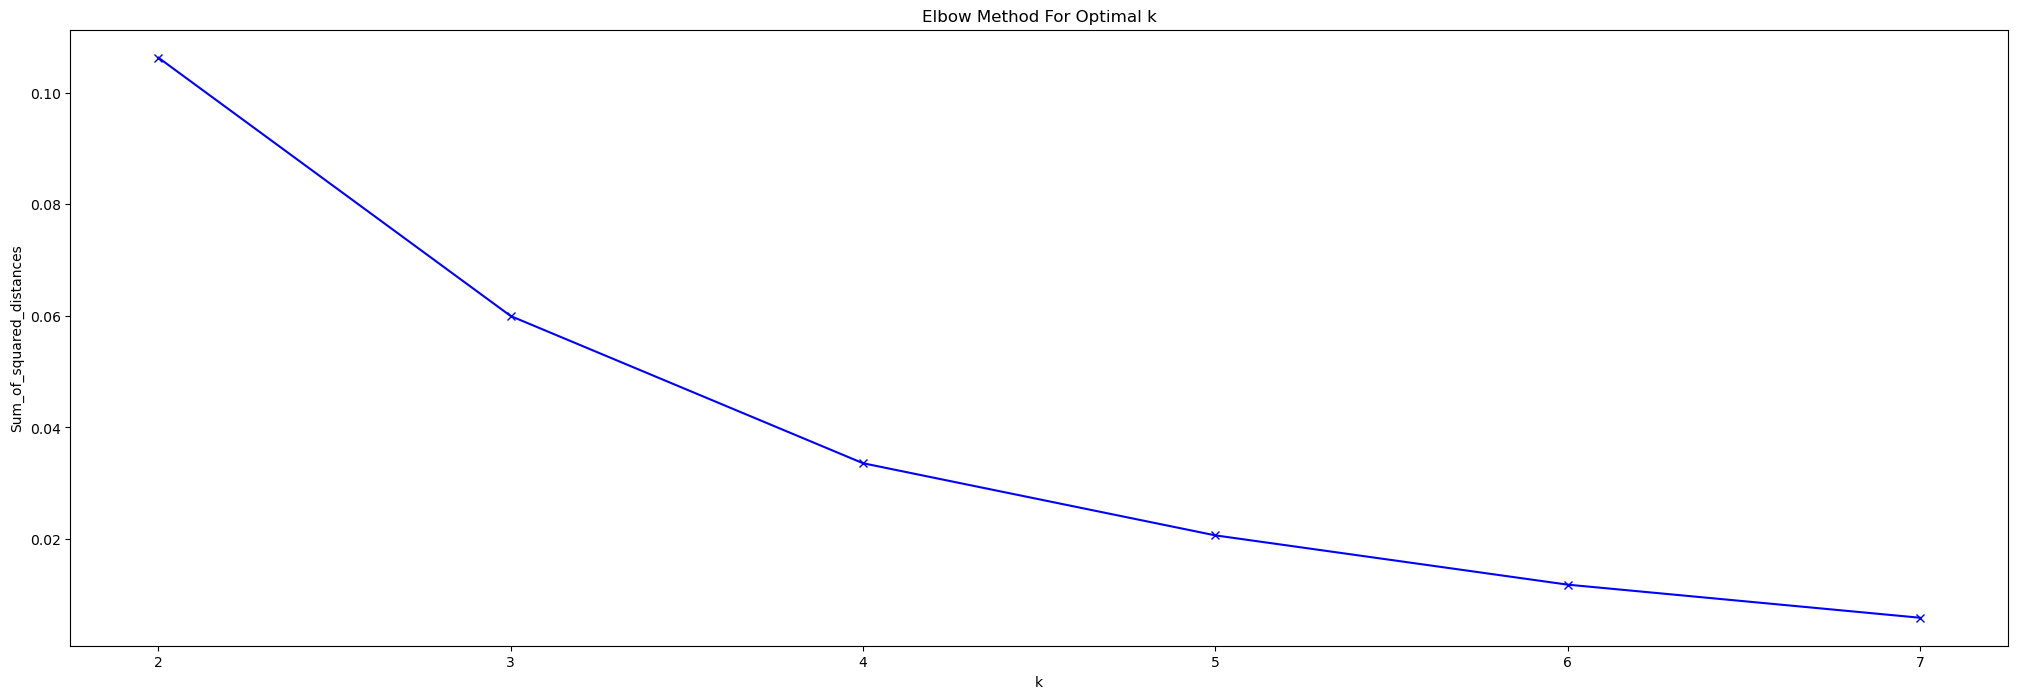

In [11]:
Sum_of_squared_distances = []
K = range(2,8)
for k in K:
    km = TimeSeriesKMeans(n_clusters=k,
                          n_init=2,
                          metric="dtw",
                          verbose=False,
                          max_iter_barycenter=10,
                          random_state=0)
    
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### k=4

In [36]:

# Perform k-means clustering using DTW
n_clusters = 4 
kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", verbose=True, random_state=42)
y_pred = kmeans.fit_predict(X)

# Print the cluster labels for each city
for i, city_data in enumerate(cities_sequences_weighted_weather):
    city_name = city_data[0]
    cluster_label = y_pred[i]
    print(f"{city_name} belongs to cluster {cluster_label}")




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.087 --> 

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


0.045 --> 0.045 --> 
Athens, Greece belongs to cluster 0
Austin, USA belongs to cluster 3
Baltimore, USA belongs to cluster 1
Barcelona, Spain belongs to cluster 0
Berlin, Germany belongs to cluster 0
Boston, USA belongs to cluster 0
Denver, USA belongs to cluster 0
Frankfurt, Germany belongs to cluster 0
Hamburg, Germany belongs to cluster 3
Houston, USA belongs to cluster 0
Jerusalem, Israel belongs to cluster 0
Lisbon, Portugal belongs to cluster 3
London, UK belongs to cluster 1
Manchester, UK belongs to cluster 2
Melbourne, Australia belongs to cluster 0
Mumbai, India belongs to cluster 0
Naples, Italy belongs to cluster 0
Nashville, USA belongs to cluster 0
Paris, France belongs to cluster 0
Philadelphia, USA belongs to cluster 0
Portland, USA belongs to cluster 0
Rome, Italy belongs to cluster 0
Salt Lake City, USA belongs to cluster 0
Santiago, Chile belongs to cluster 2
Washington, USA belongs to cluster 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [38]:
# Compute the silhouette score
silhouette_avg = silhouette_score(X, y_pred)

print("Kmeans Silhouette Score:", silhouette_avg)

Kmeans Silhouette Score: 0.7794768365431726


## DBSCAN

In [73]:
# Extract the time series data from the nested list
time_series_data = [city_data[2].values for city_data in cities_sequences_weighted_weather]

# Remove rows containing NaN values
time_series_data = [ts[~np.isnan(ts)] for ts in time_series_data]


# Convert the time series data to a tslearn-compatible format
X = np.array(time_series_data)

# Compute pairwise DTW distances
dists = dtw.distance_matrix(X)

C:\Users\amitb\AppData\Local\Temp\ipykernel_29144\678794995.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(time_series_data)


### Hyperparameter

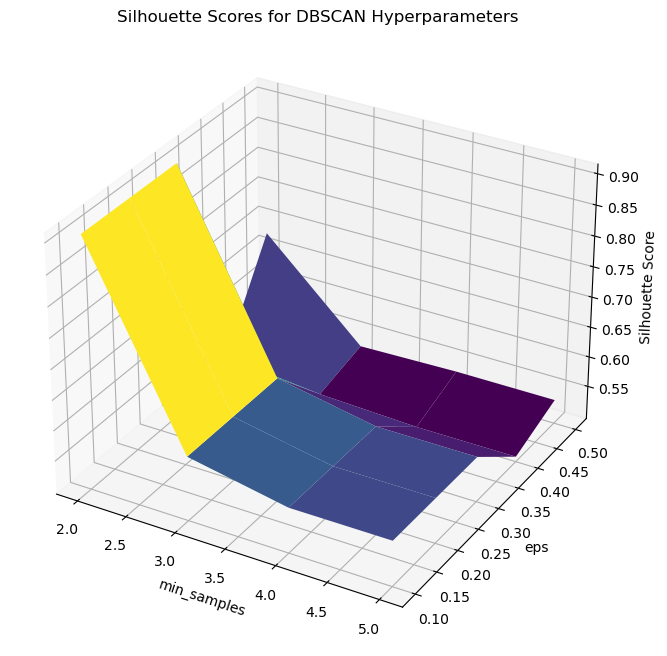

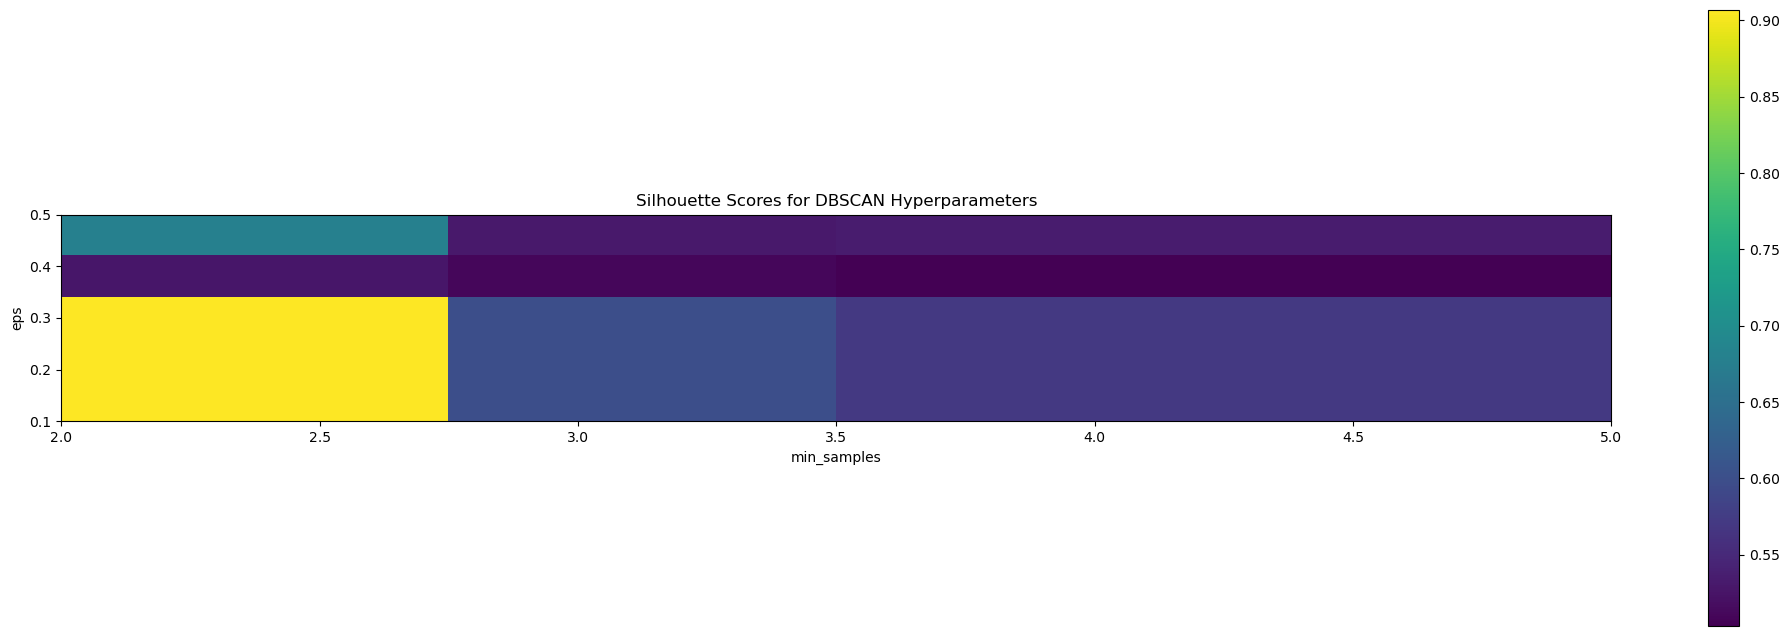

In [74]:
# Define the range of hyperparameters to explore
eps_values = [0.1, 0.2, 0.3, 0.4, 0.5]
min_samples_values = [2, 3, 4, 5]

silhouette_scores = np.zeros((len(eps_values), len(min_samples_values)))

# Perform hyperparameter tuning and compute silhouette scores
for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(metric='precomputed', eps=eps, min_samples=min_samples)
        y_pred = dbscan.fit_predict(dists)

        # Check if multiple clusters are formed
        unique_clusters = len(np.unique(y_pred))
        if unique_clusters > 1:
            # Compute the silhouette score
            silhouette = silhouette_score(dists, y_pred)
            silhouette_scores[i, j] = silhouette

# Plot the silhouette scores as a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Xx, Y = np.meshgrid(min_samples_values, eps_values)
ax.plot_surface(Xx, Y, silhouette_scores, cmap='viridis')
ax.set_xlabel('min_samples')
ax.set_ylabel('eps')
ax.set_zlabel('Silhouette Score')
ax.set_title('Silhouette Scores for DBSCAN Hyperparameters')

plt.show()

# Plot the silhouette scores as a heatmap
plt.imshow(silhouette_scores, cmap='viridis', origin='lower', extent=[min_samples_values[0], min_samples_values[-1], eps_values[0], eps_values[-1]])
plt.colorbar()
plt.xlabel('min_samples')
plt.ylabel('eps')
plt.title('Silhouette Scores for DBSCAN Hyperparameters')
plt.show()

In [75]:
print("Best eps: ",best_eps)
print("Best minimum samples: ",best_min_samples)
print("I will choose 3 minimum samples to avoid overfitting")

Best eps:  0.1
Best minimum samples:  2
I will choose 3 minimum samples to avoid overfitting


In [76]:
# Perform DBSCAN clustering with DTW distances
dbscan = DBSCAN(metric='precomputed', eps=0.1, min_samples=3)
y_pred = dbscan.fit_predict(dists)

# Print the cluster assignments
for city, cluster_id in zip([city_data[0] for city_data in cities_sequences_weighted_weather], y_pred):
    print(f"{city} belongs to cluster {cluster_id}")

Athens, Greece belongs to cluster 0
Austin, USA belongs to cluster 1
Baltimore, USA belongs to cluster -1
Barcelona, Spain belongs to cluster 2
Berlin, Germany belongs to cluster 2
Boston, USA belongs to cluster 2
Denver, USA belongs to cluster 2
Frankfurt, Germany belongs to cluster 0
Hamburg, Germany belongs to cluster 1
Houston, USA belongs to cluster -1
Jerusalem, Israel belongs to cluster -1
Lisbon, Portugal belongs to cluster 1
London, UK belongs to cluster -1
Manchester, UK belongs to cluster -1
Melbourne, Australia belongs to cluster 0
Mumbai, India belongs to cluster -1
Naples, Italy belongs to cluster 0
Nashville, USA belongs to cluster 2
Paris, France belongs to cluster -1
Philadelphia, USA belongs to cluster 0
Portland, USA belongs to cluster 2
Rome, Italy belongs to cluster 2
Salt Lake City, USA belongs to cluster 0
Santiago, Chile belongs to cluster -1
Washington, USA belongs to cluster 2


In [77]:
# Compute the silhouette score
silhouette_avg = silhouette_score(X, y_pred)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5586056027974451


### Dandogram

C:\Users\amitb\AppData\Local\Temp\ipykernel_29144\1894674861.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(dists, method='single')


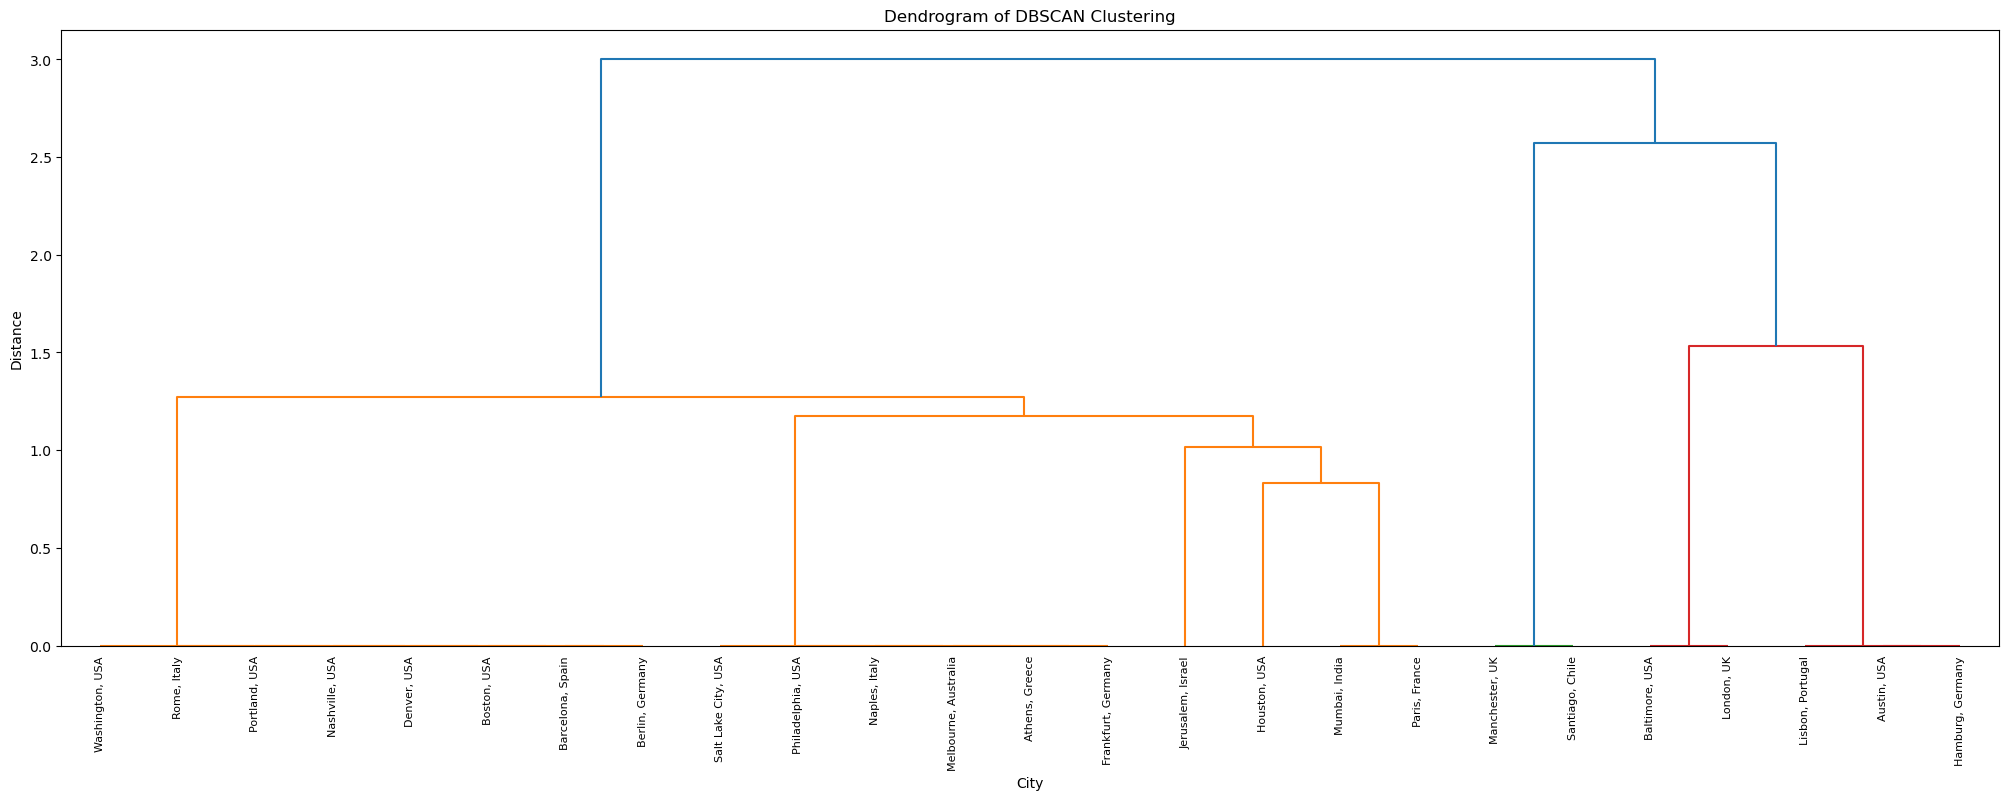

In [78]:

linkage_matrix = linkage(dists, method='single')
dendrogram(linkage_matrix, labels=[city_data[0] for city_data in cities_sequences_weighted_weather], orientation='top', leaf_font_size=8)
plt.xlabel('City')
plt.ylabel('Distance')
plt.title('Dendrogram of DBSCAN Clustering')
plt.xticks(rotation=90)
plt.show()

## Agglomerative

### Hyperparameter

In [80]:
# Define hyperparameters to tune
param_grid = {
    'n_clusters': range(2, 8),  # Number of clusters
    'affinity': ['precomputed', 'cosine'],  # Distance metric
    'linkage': ['complete', 'average', 'single']  # Linkage criterion
}

# Perform grid search using silhouette score as the evaluation metric
best_score = -1
best_params = {}
for n_clusters in param_grid['n_clusters']:
    for affinity in param_grid['affinity']:
        for linkage in param_grid['linkage']:
            agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity=affinity, linkage=linkage)
            y_pred = agg_clustering.fit_predict(dists)
            silhouette = silhouette_score(X, y_pred)
            if silhouette > best_score:
                best_score = silhouette
                best_params = {'n_clusters': n_clusters, 'affinity': affinity, 'linkage': linkage}

C:\Users\amitb\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
C:\Users\amitb\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
C:\Users\amitb\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
C:\Users\amitb\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow obse

In [85]:
# Print the best hyperparameters and corresponding silhouette score
print("Best Hyperparameters:", best_params)
print("Best Silhouette Score:", best_score)
print("I choose 3 clusters to avoid overfitting")

Best Hyperparameters: {'n_clusters': 7, 'affinity': 'cosine', 'linkage': 'complete'}
Best Silhouette Score: 0.8669633193432784
I choose 4 clusters to avoid overfitting


In [89]:
# Perform Agglomerative Clustering with DTW distances
agg_clustering = AgglomerativeClustering(n_clusters=3, affinity='cosine', linkage='complete')
y_pred = agg_clustering.fit_predict(dists)

# Print the cluster assignments
for city, cluster_id in zip([city_data[0] for city_data in cities_sequences_weighted_weather], y_pred):
    print(f"{city} belongs to cluster {cluster_id}")

Athens, Greece belongs to cluster 1
Austin, USA belongs to cluster 0
Baltimore, USA belongs to cluster 0
Barcelona, Spain belongs to cluster 2
Berlin, Germany belongs to cluster 2
Boston, USA belongs to cluster 2
Denver, USA belongs to cluster 2
Frankfurt, Germany belongs to cluster 1
Hamburg, Germany belongs to cluster 0
Houston, USA belongs to cluster 1
Jerusalem, Israel belongs to cluster 1
Lisbon, Portugal belongs to cluster 0
London, UK belongs to cluster 0
Manchester, UK belongs to cluster 0
Melbourne, Australia belongs to cluster 1
Mumbai, India belongs to cluster 1
Naples, Italy belongs to cluster 1
Nashville, USA belongs to cluster 2
Paris, France belongs to cluster 1
Philadelphia, USA belongs to cluster 1
Portland, USA belongs to cluster 2
Rome, Italy belongs to cluster 2
Salt Lake City, USA belongs to cluster 1
Santiago, Chile belongs to cluster 0
Washington, USA belongs to cluster 2


C:\Users\amitb\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


### Dandogram

C:\Users\amitb\AppData\Local\Temp\ipykernel_29144\2515818972.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(dists, method='complete')


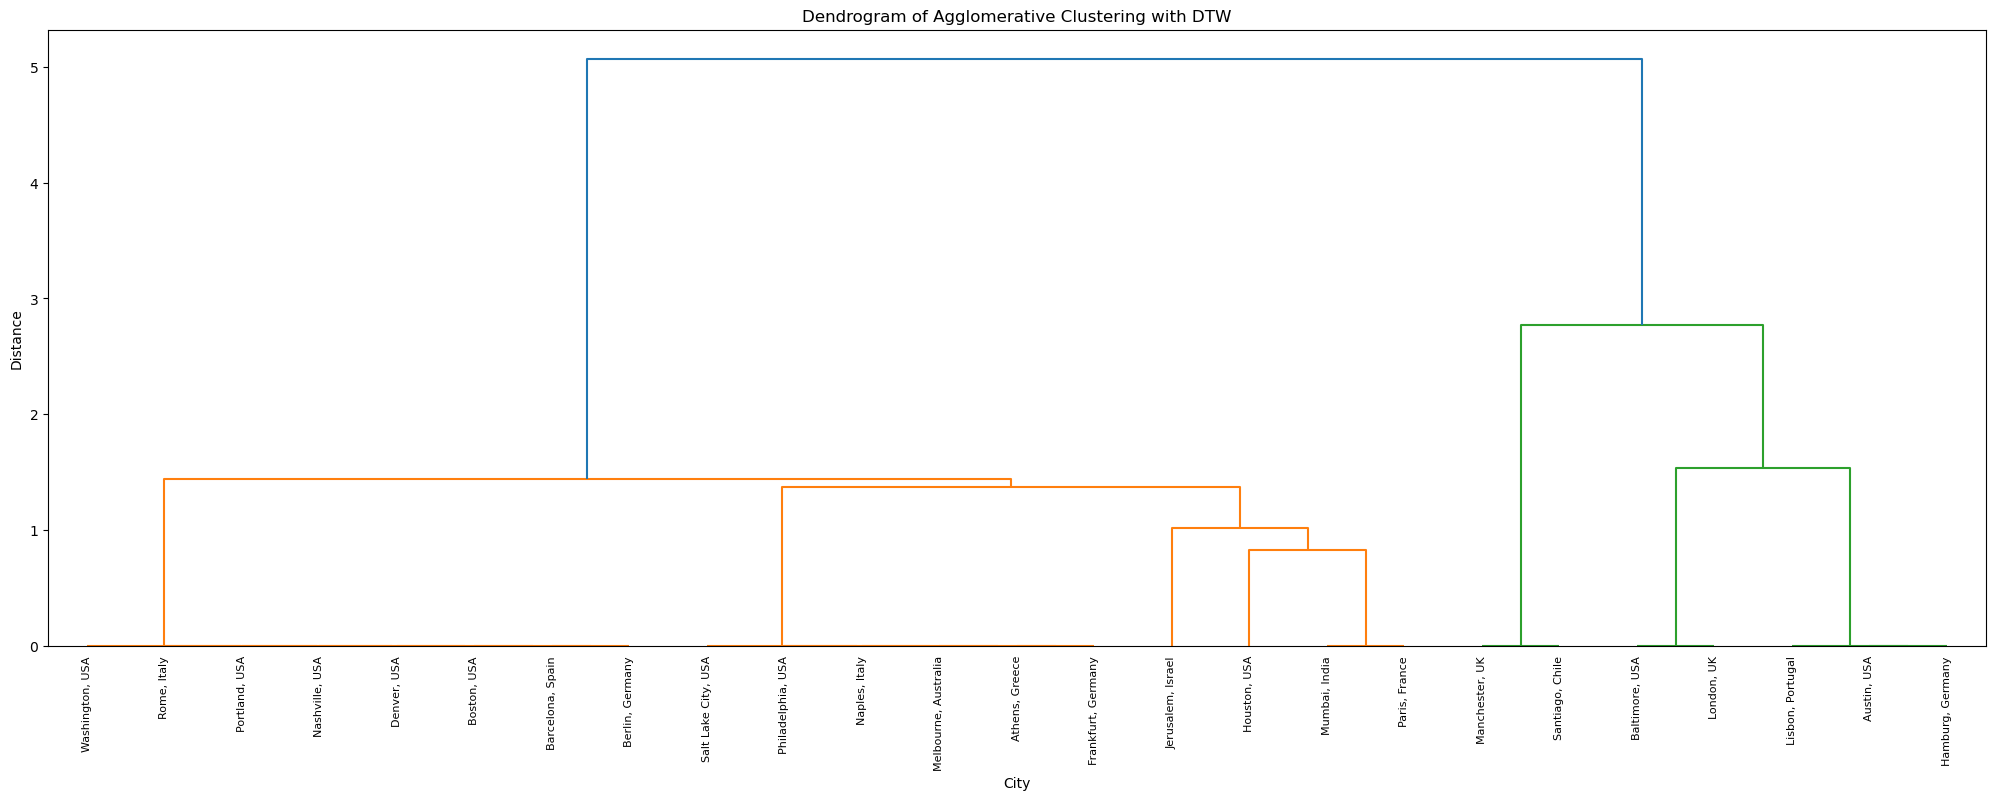

In [90]:

linkage_matrix = linkage(dists, method='complete')
dendrogram(linkage_matrix, labels=[city_data[0] for city_data in cities_sequences_weighted_weather], orientation='top', leaf_font_size=8)
plt.xlabel('City')
plt.ylabel('Distance')
plt.title('Dendrogram of Agglomerative Clustering with DTW')
plt.xticks(rotation=90)
plt.show()

In [91]:
# Compute the silhouette score
silhouette_avg = silhouette_score(X, y_pred)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5435237979029808
